In [1]:
#ElhamMirzaei1
#Import the necessary modules for plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading our data
df=pd.read_csv(r'CarPrice_Assignment.csv')
#show first 5 rows of our data
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#finding the shape of the dataframe
df.shape

(205, 26)

In [4]:
#describing the dataframe
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
#finding information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#finding the missing values(we have not any null)
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
#data cleaning
df.duplicated(subset = ['car_ID']).sum()

0

In [8]:
#number of cars
df.CarName.count()

205

In [9]:
#number of unique cars
df.CarName.nunique()

147

In [10]:
# Creating  CarCompany from CarName
df['CarCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df['CarCompany'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarCompany, dtype: object

In [11]:
#We have spelling errors
df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
df['CarCompany'] = df['CarCompany'].apply(lambda c : c if pd.isnull(c) else c.replace('maxda', 'mazda'))
df['CarCompany'] = df['CarCompany'].apply(lambda c : c if pd.isnull(c) else c.replace('porcshce', 'porsche'))
df['CarCompany'] = df['CarCompany'].apply(lambda c : c if pd.isnull(c) else c.replace('toyouta', 'toyota'))
df['CarCompany'] = df['CarCompany'].apply(lambda c : c if pd.isnull(c) else c.replace('vokswagen', 'volkswagen'))
df['CarCompany'] = df['CarCompany'].apply(lambda c : c if pd.isnull(c) else c.replace('vw', 'volkswagen'))
df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
#explore Column CarName
df['CarCompany'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: CarCompany, dtype: int64

In [14]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


[Text(0, 0.5, 'number of cars'), Text(0.5, 0, 'Car company')]

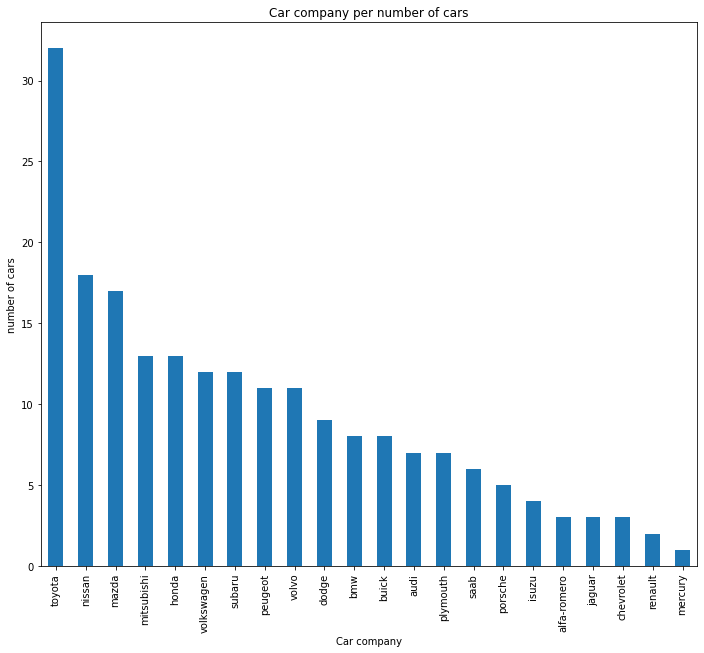

In [15]:
#visualizing CarCompany data
plt.figure(figsize=(40, 10))
plt.subplot(1,3,1)
plt1 = df.CarCompany.value_counts().plot(kind='bar')
plt.title('Car company per number of cars')
plt1.set(xlabel = 'Car company', ylabel='number of cars')

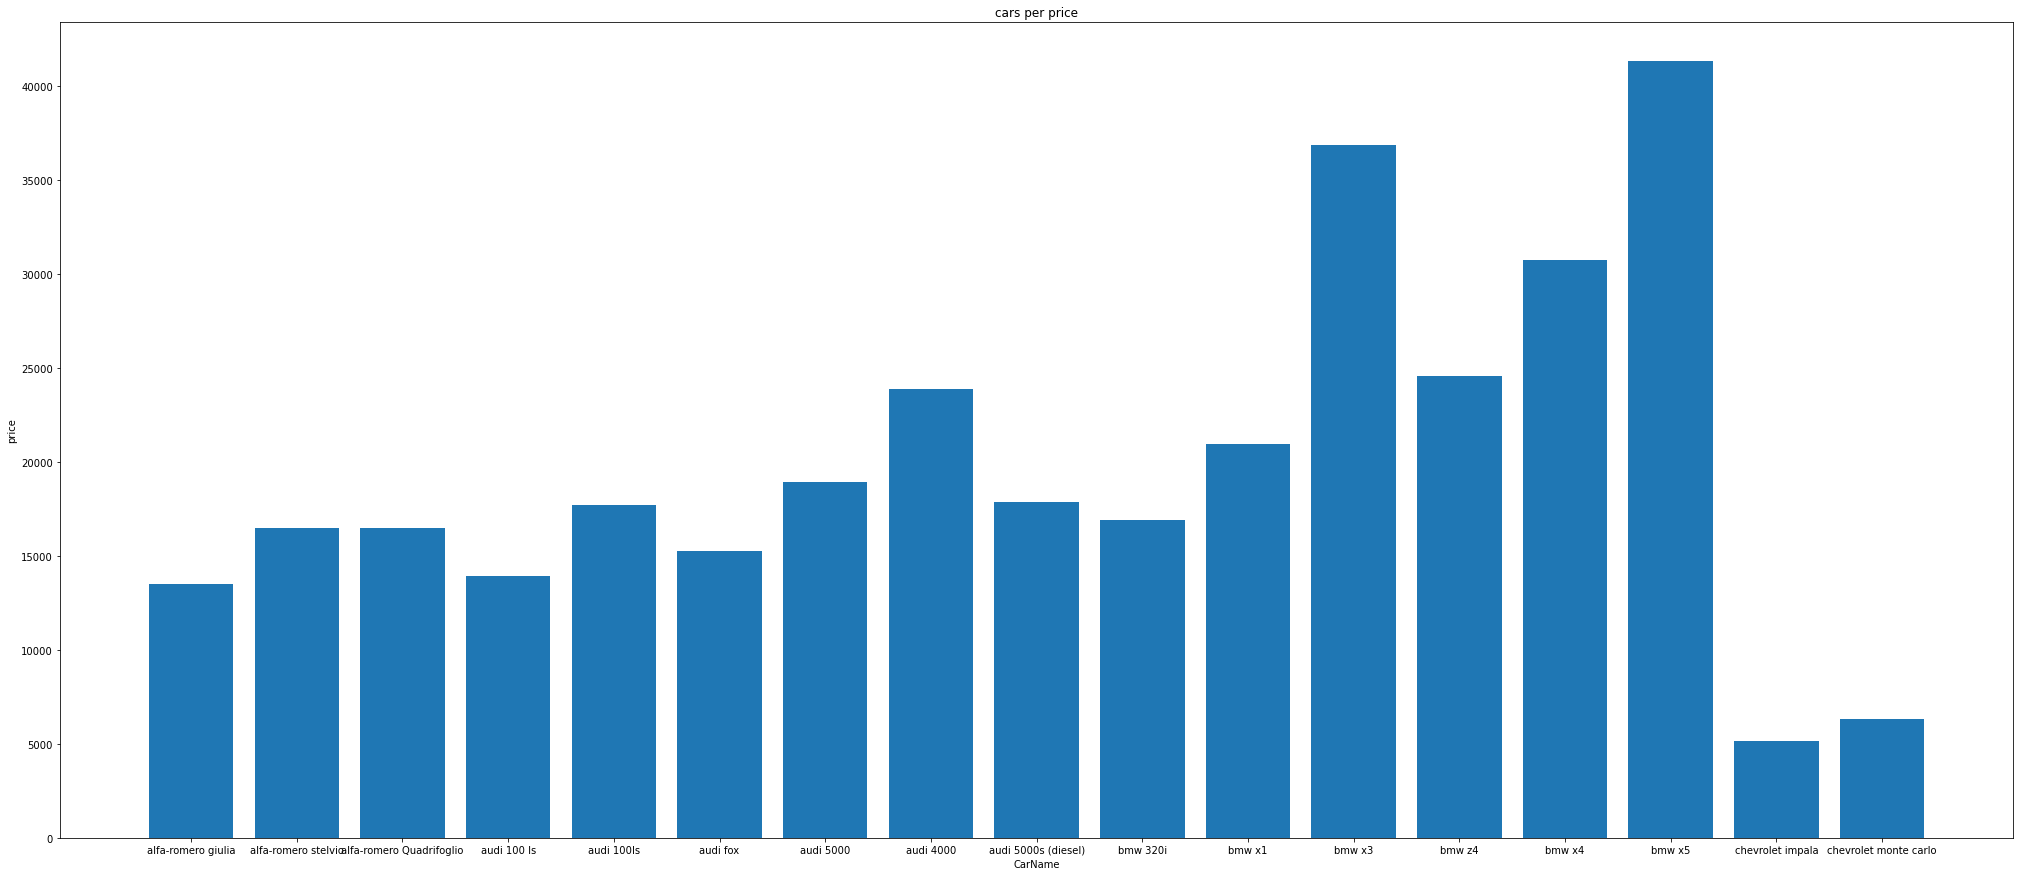

In [16]:
#visualizing price data
name = df['CarName'].head(20)
price = df['price'].head(20)
 
# Figure Size
fig = plt.figure(figsize =(35,15))

# Horizontal Bar Plot
plt.bar(name[0:20], price[0:20])
plt.title('cars per price')
plt.xlabel('CarName')
plt.ylabel('price')
plt.savefig('cars per price.png')

# Show Plot
plt.show()

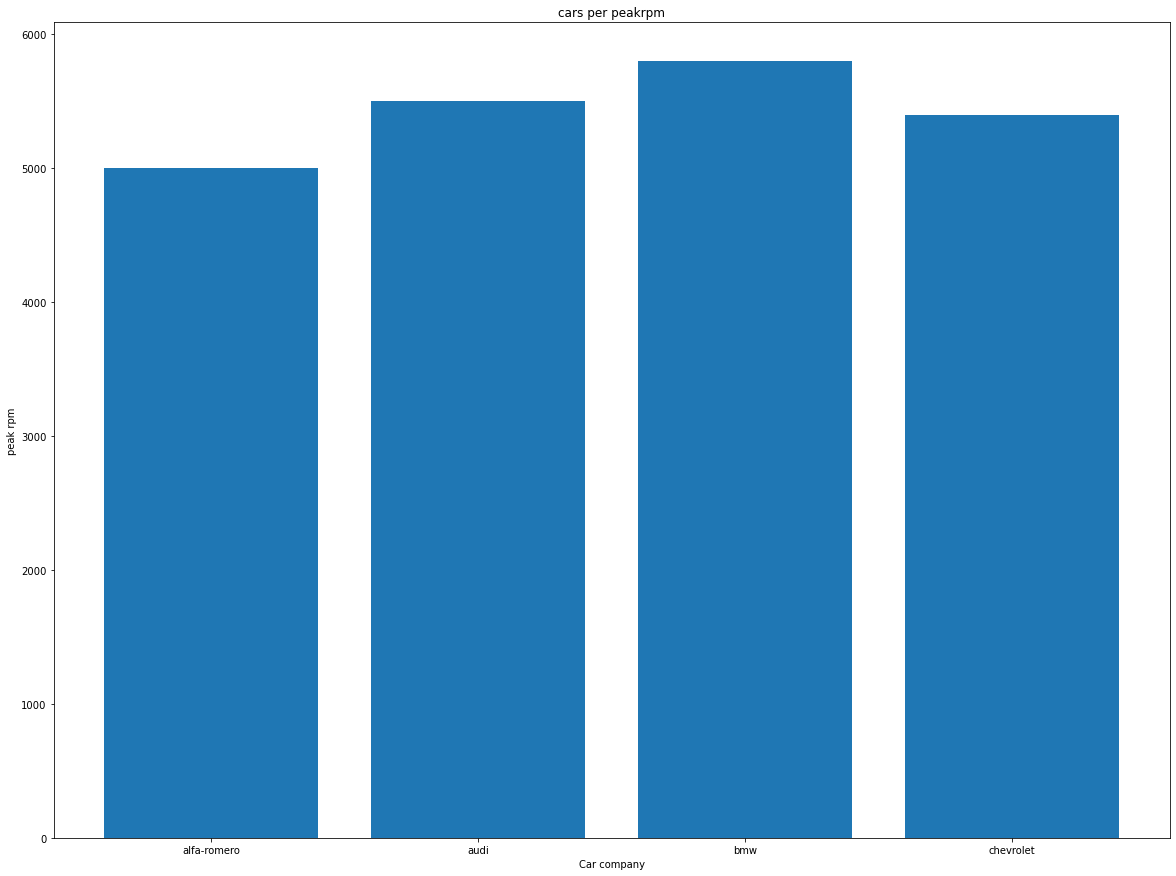

In [17]:
#visualizing peakrpm data
name = df['CarCompany'].head(20)
price = df['peakrpm'].head(20)
fig = plt.figure(figsize =(20, 15))
plt.bar(name[0:20], price[0:20])
plt.title('cars per peakrpm')
plt.xlabel('Car company')
plt.ylabel('peak rpm')
plt.savefig('cars per peakrpm.png')
plt.show()